In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


combineddf1 = pd.read_csv('converted2.csv')

#bins
percapitabins = [0]
powers_5 = [1000*5**n for n in range(0,5)]
percapitabins.extend(powers_5)
percapitalabels = [f'0 up to 1000']
for n in range(1,5):
  percapitalabels.append(f'{1000*5**(n-1)} to {1000*5**(n)}')
print(percapitabins ,percapitalabels)
combineddf1["binnedpercapita"] = pd.cut(combineddf1['Gross national income (GNI) per capita'], bins=percapitabins , labels=percapitalabels)
combineddf1.to_excel('converted.xls')

combineddf1.head()

[0, 1000, 5000, 25000, 125000, 625000] ['0 up to 1000', '1000 to 5000', '5000 to 25000', '25000 to 125000', '125000 to 625000']


,Country,accessibility_to_cities,elevation,aspect,slope,cropland_cover,tree_canopy_cover,isothermality,rain_coldestQuart,rain_driestMonth,...,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,binnedpercapita
0,Russia,2143.587912,448.533542,178.456969,0.486310,7.381210,20.356473,19.351714,63.279186,15.345187,...,6.030275,5.895725,1.281778,1.469282,0.547349,0.373783,0.052264,0.032963,2.205607,5000 to 25000
1,United States,638.757539,759.251226,166.560382,0.529687,19.743870,16.728462,32.952882,141.820680,28.787362,...,7.074657,6.911343,1.546259,1.419921,0.774287,0.505741,0.392579,0.135639,2.218113,25000 to 125000
2,Canada,3220.715175,508.284763,169.290792,0.397220,3.796340,20.587476,19.862863,80.937465,19.612252,...,7.384403,7.247597,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264,25000 to 125000
3,Indonesia,504.884807,342.053688,168.270799,0.909755,13.240866,55.478882,84.942402,673.078720,136.174030,...,5.352889,5.171112,0.995539,1.274445,0.492346,0.443323,0.611705,0.015317,1.429477,5000 to 25000
4,China,466.566902,1788.508668,169.098156,0.943247,22.183475,11.579313,30.945546,34.736686,8.319759,...,5.319278,5.226721,1.081166,1.160837,0.741416,0.472788,0.028807,0.022794,1.764939,5000 to 25000


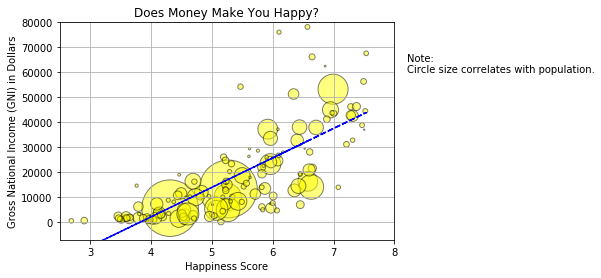

In [46]:
# Are people happier in countries with a higher GDP per capita?

happy = combineddf1["Happiness.Score"]
gni = combineddf1["Gross national income (GNI) per capita"]
population = combineddf1["Total Population (millions) 2015"]

plt.scatter(happy, gni, marker="o", facecolors="yellow", edgecolors="black", s=(population**0.9)*5, alpha=0.5)

plt.grid()
plt.title("Does Money Make You Happy?")
plt.xlabel("Happiness Score")
plt.ylabel("Gross National Income (GNI) in Dollars")
plt.ylim(-7000, 80000)
plt.xlim(2.5,8)

plt.text(8.2,60000,"Note:\nCircle size correlates with population.")

plt.savefig("Happiness Compared to GNI.png")

z = np.polyfit(happy, gni, 1)
p = np.poly1d(z)
plt.plot(happy,p(happy),"b--")

plt.show()

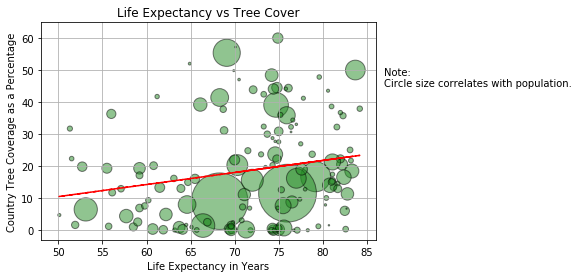

In [47]:
# Do people in countries with more tree cover live longer?

trees = combineddf1["tree_canopy_cover"]
longevity = combineddf1["Life expectancy"]
population = combineddf1["Total Population (millions) 2015"]

plt.scatter(longevity, trees, marker="o", facecolors="forestgreen", edgecolors="black", s=(population**0.9)*5, alpha=0.5)

plt.grid()
plt.title("Life Expectancy vs Tree Cover")
plt.xlabel("Life Expectancy in Years")
plt.ylabel("Country Tree Coverage as a Percentage")
plt.ylim(-3, 65)
plt.xlim(48,86)
plt.text(87,45,"Note:\nCircle size correlates with population.")

plt.savefig("Life Expectancy Compared to Tree Cover.png")

z = np.polyfit(longevity, trees, 1)
p = np.poly1d(z)
plt.plot(longevity,p(longevity),"r--")

plt.show()

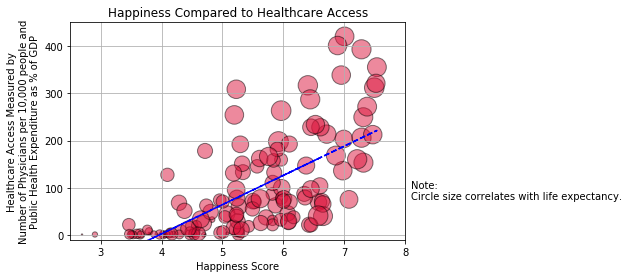

In [48]:
# Are healthier people happier?

phys = combineddf1["Physicians  (per 10,000 people) 2001-2014"]
phe = combineddf1["Public health expenditure (% of GDP) 2014"]
phys_phe = (phys*phe)
combineddf1["pphe"] = phys_phe
healthdf = combineddf1[["Happiness.Score","Life expectancy", "pphe", "Total Population (millions) 2015", "elevation"]]
healthdf2 = healthdf.dropna(axis=0, how="any")
health = healthdf2["pphe"]
happy2 = healthdf2["Happiness.Score"]
longevity2 = healthdf2["Life expectancy"]
population2 = healthdf2["Total Population (millions) 2015"]


plt.scatter(happy2, health, marker="o", facecolors="crimson", edgecolors="black", s=(longevity2-50)**1.7, alpha=0.5)

plt.grid()
plt.title("Happiness Compared to Healthcare Access")
plt.xlabel("Happiness Score")
plt.ylabel("Healthcare Access Measured by\nNumber of Physicians per 10,000 people and\nPublic Health Expenditure as % of GDP")
plt.ylim(-10, 450)
plt.xlim(2.5,8)
plt.text(8.1,75,"Note:\nCircle size correlates with life expectancy.")

plt.savefig("Happiness Compared to Access to Healthcare.png")

z = np.polyfit(happy2, health, 1)
p = np.poly1d(z)
plt.plot(happy2,p(happy2),"b--")

plt.show()

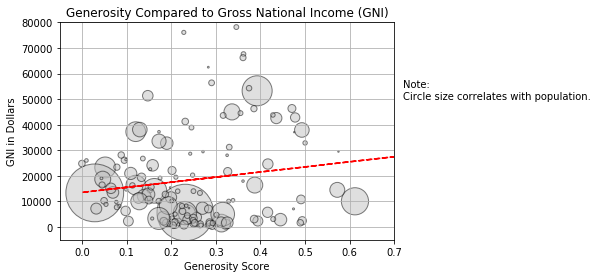

In [49]:
# Are people in countries with an above average GPD more generous

gni = combineddf1["Gross national income (GNI) per capita"]
generosity = combineddf1["Generosity"]
population = combineddf1["Total Population (millions) 2015"]

plt.scatter(generosity, gni, marker="o", facecolors="silver", edgecolors="black", s=(population**0.9)*5, alpha=0.5)

plt.grid()
plt.title("Generosity Compared to Gross National Income (GNI)")
plt.xlabel("Generosity Score")
plt.ylabel("GNI in Dollars")
plt.ylim(-5000, 80000)
plt.xlim(-0.05,0.7)
plt.text(0.72,50000,"Note:\nCircle size correlates with population.")
plt.savefig("Generosity Compared to GNI.png")

z = np.polyfit(generosity, gni, 1)
p = np.poly1d(z)
plt.plot(generosity,p(generosity),"r--")

plt.show()

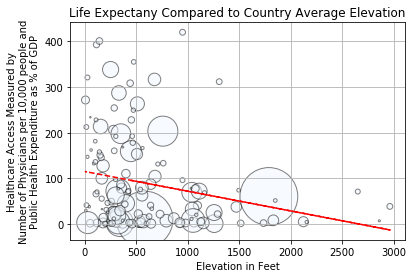

In [50]:
# Are people in highly elevated countries healthier on average?

healthdf2 = healthdf.dropna(axis=0, how="any")
health = healthdf2["pphe"]
population2 = healthdf2["Total Population (millions) 2015"]
elevation = healthdf2["elevation"]

plt.scatter(elevation, health, marker="o", facecolors="aliceblue", edgecolors="black", s=(population2**0.9)*5, alpha=0.5)

plt.grid()
plt.title("Life Expectany Compared to Country Average Elevation")
plt.xlabel("Elevation in Feet")
plt.ylabel("Healthcare Access Measured by\nNumber of Physicians per 10,000 people and\nPublic Health Expenditure as % of GDP")
# plt.ylim(-200, 3200)
# plt.xlim(49,86)
plt.text(87,2000,"Note:\nCircle size correlates with population.")

plt.savefig("Elevation Compared to Healthcare Access.png")

z = np.polyfit(elevation, health, 1)
p = np.poly1d(z)
plt.plot(elevation,p(elevation),"r--")

plt.show()

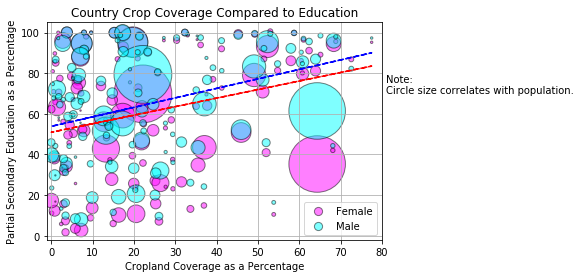

In [57]:
# Is there is relationship between crop cover and education?

cropdf = combineddf1[["cropland_cover","Population with at least some secondary education % (2005-2015) Female",
                      "Population with at least some secondary education % (2005-2015) Male","Total Population (millions) 2015"]]
cropdf = cropdf.dropna(axis=0, how="any")
crop2 = cropdf["cropland_cover"]
female_education = cropdf["Population with at least some secondary education % (2005-2015) Female"]
male_education = cropdf["Population with at least some secondary education % (2005-2015) Male"]
population3 = cropdf["Total Population (millions) 2015"]

plt.scatter(crop2, female_education, marker="o", facecolors="fuchsia", edgecolors="black", s=(population**0.9)*5, alpha=0.5, label="Female")
plt.scatter(crop2, male_education, marker="o", facecolors="cyan", edgecolors="black", s=(population**0.9)*5, alpha=0.5, label = "Male")

plt.grid()
plt.title("Country Crop Coverage Compared to Education")
plt.xlabel("Cropland Coverage as a Percentage")
plt.ylabel("Partial Secondary Education as a Percentage")
plt.ylim(-2, 105)
plt.xlim(-1,80)
plt.text(81,70,"Note:\nCircle size correlates with population.")

plt.savefig("Country Crop Coverage Compared to Education.png")

plt.legend(markerscale = 0.2)

z = np.polyfit(crop2, female_education, 1)
p = np.poly1d(z)
plt.plot(crop2,p(crop2),"r--")

z = np.polyfit(crop2, male_education, 1)
p = np.poly1d(z)
plt.plot(crop2,p(crop2),"b--")

plt.show()

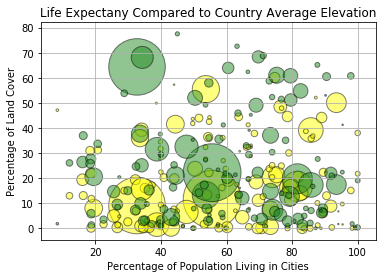

In [52]:
crop = combineddf1["cropland_cover"]
trees = combineddf1["tree_canopy_cover"]
urban = combineddf1["Population Urban 2015 %"]
population = combineddf1["Total Population (millions) 2015"]

plt.scatter(urban, trees, marker="o", facecolors="yellow", edgecolors="black", s=(population**0.9)*5, alpha=0.5)
plt.scatter(urban, crop, marker="o", facecolors="forestgreen", edgecolors="black", s=(population**0.9)*5, alpha=0.5)

# Incorporate the other graph properties
plt.grid()
plt.title("Life Expectany Compared to Country Average Elevation")
plt.xlabel("Percentage of Population Living in Cities")
plt.ylabel("Percentage of Land Cover")
# plt.ylim(-200, 3200)
# plt.xlim(49,86)
# plt.text(87,2000,"Note:\nCircle size correlates with population.")
# plt.savefig("Happiness Compared to Life Expectancy.png")

z = np.polyfit(, female_education, 1)
p = np.poly1d(z)
plt.plot(crop2,p(crop2),"r--")

plt.show()